# API to pull data from Google Trends
----
unofficial API https://github.com/GeneralMills/pytrends 

source blog https://mathewanalytics.com/2017/01/30/extract-google-trends-data-with-python-2/

In [1]:
import os, re, csv, time
import pandas as pd
import numpy as np
from random import randint
import pytrends
from pytrends.request import TrendReq
import base64
import matplotlib.pyplot as plt
import seaborn 

# set gmail credentials
google_username = "clairexichen@gmail.com"
google_password = str(base64.b64decode("MTk5YnRJZnRpZ3RjdGRhYmE="))

In [2]:
xl = pd.ExcelFile("~/Documents/data/cd_banks_kw.xls")
df = xl.parse("Sheet1")
kw = list(df['kw'])
top = kw[7]
del kw[7]
advertisers = list(df['bank'])
topname = advertisers[7]
del advertisers[7]

##compare to top ranked capital one
n = 4#run one at a time, otherwise returns relative popularity
kwl = [[top]+kw[i:i + n] for i in xrange(0, len(kw), n)]
namel = [[topname]+advertisers[i:i + n] for i in xrange(0, len(advertisers), n)]
#print kwl[4]
#print namel[4]
#df
#len(kwl)

##run one at a time, returns relative popularity to itself over time
#n = 1
#kwl = [list(kw[i:i + n]) for i in xrange(0, len(kw), n)]
#namel = [list(advertisers[i:i + n]) for i in xrange(0, len(advertisers), n)]

In [7]:
def GT_Run(keys,timeframe,google_username,google_password,geo="US",category=0,gprop=''):
    """pull data from google trends"""
    # connect to Google
    connector = TrendReq(google_username, google_password, hl='en-US', tz=360, custom_useragent=None)#cst
    # make request
    if category==0:
        connector.build_payload(kw_list=keys, timeframe=timeframe, geo=geo)
    else:
        connector.build_payload(kw_list=keys, timeframe=timeframe, geo=geo, cat=category, gprop=gprop)
    # wait a random amount of time between requests to avoid bot detection
    time.sleep(randint(3, 6))
    # download data as pd
    interest_over_time_df = connector.interest_over_time()
    
    return interest_over_time_df

timeframe="today 3-m"
geo="US"
category=7#7Finance
resl = []
for i in xrange(len(kwl)):
    res = GT_Run(kwl[i],timeframe,google_username,google_password,geo=geo,category=category)
    res.columns = namel[i]
    resl.append(res)

In [8]:
#concatenate columns
resdf = pd.concat(resl,axis=1)
#resdf.shape
#resdf1.describe().T
resdf.to_csv("~/Documents/data/gt0712_run2.txt", sep='\t')
#resdf1 = pd.read_csv("~/Documents/data/gt0621_run3.txt",sep="\t")
resdf = resdf.iloc[:,[0]+[i for i in xrange(55) if (i)%5!=0]]
resdf.describe().T['mean'].sort_values()
#resdf.median().sort_values()

eastern savings bank, fsb                                   0.000000
State Bank of India/ State Bank of India New York           0.000000
United Bank/Prime Visibility                                0.000000
Red Rocks Credit Union                                      0.000000
Randolph Savings Bank/Galapagos Marketing                   0.000000
PurePoint Financial/MUFG Union Bank, N.A                    0.000000
My e-BAnC/BAC Florida Bank                                  0.000000
My Banking Direct, a service of NY Community Bank           0.000000
MidFirst Direct/Riester                                     0.000000
Mercantil Bank/Beyond Total Branding                        0.000000
Marlin Business Bank                                        0.000000
Live Oak Bank                                               0.000000
Third Federal Savings and Loan Association of Cleveland     0.000000
Kinecta Federal Credit Union                                0.000000
Heritage Credit Union             

Populating the interactive namespace from numpy and matplotlib


/Users/xi.chen/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


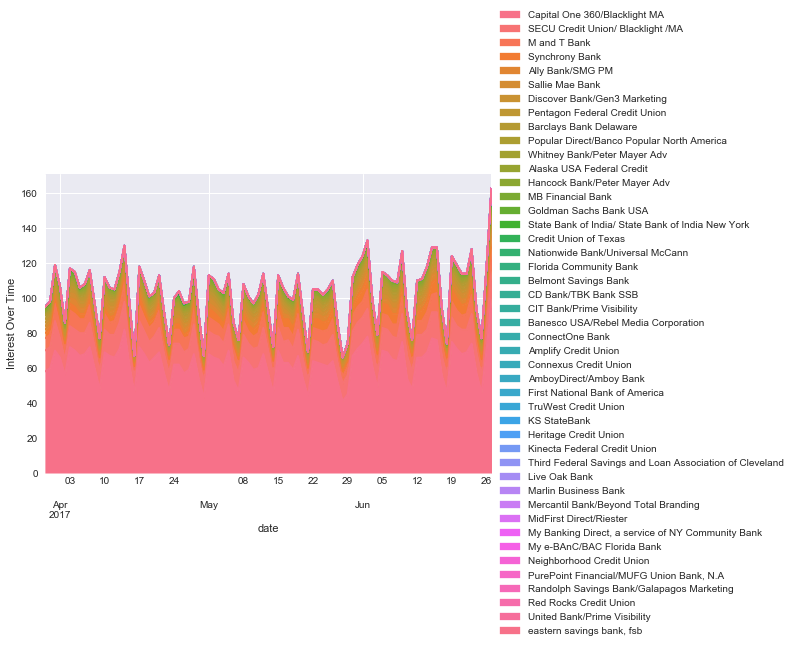

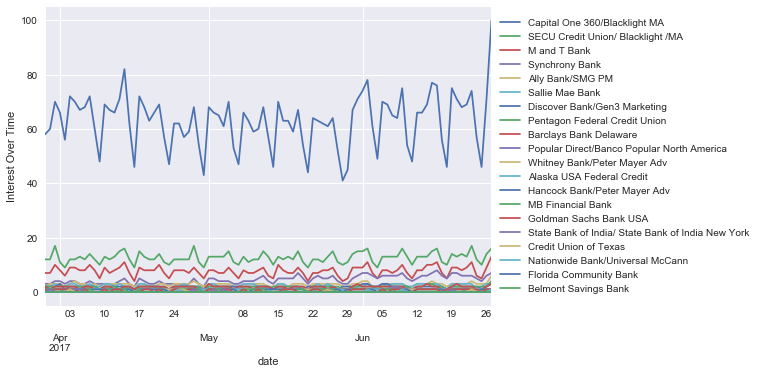

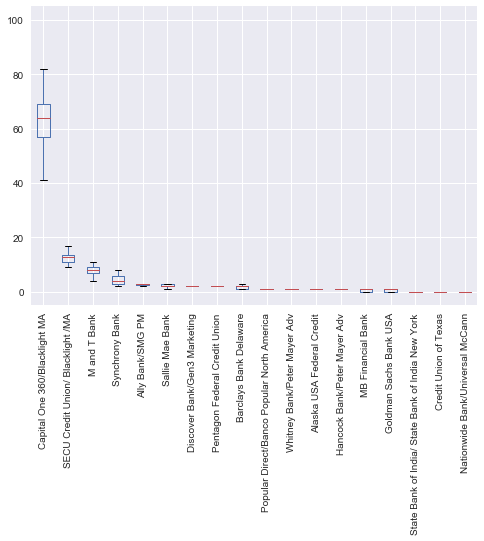

In [9]:
%pylab inline
#pylab.rcParams['figure.figsize'] = (100, 10)
seaborn.set() 
meds = resdf.mean()
meds.sort_values(ascending=False,inplace=True)
resdf = resdf[meds.index]
#xnames = pd.columns.values.tolist()
resdf.plot(kind='area',color=seaborn.color_palette("husl", 44))#diverging_palette(10, 220, n=44))#colormap='gist_stern')
plt.ylabel('Interest Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

resdf.iloc[:,:20].plot(kind='line')#,rot=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Interest Over Time')
plt.show()

resdf.iloc[:,:18].plot(kind='box',rot=90)
#plt.ylabel('Interest Over Time')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

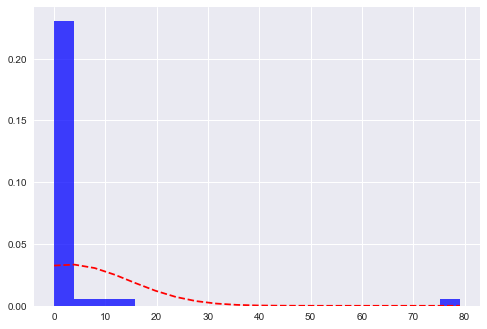

In [221]:
y = resdf.mean()
#y.plot(kind='bar', legend = False, width = .6, color="gray", alpha=.5)#, figsize = (2,5))
#plt.ylabel('Average Interest')
#plt.title('Google Trends')
#plt.show()

n, bins, patches = plt.hist(y, 20, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf(bins, y.mean(),y.std())
plt.plot(bins, y, 'r--')


In [214]:
from sklearn import datasets, linear_model
import re

x = re.compile('(19|20)dd-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])')
x

re.compile(r'(19|20)dd-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])')